In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
def showIMG(image):
    plt.imshow(image[:,:,::-1])

In [57]:
prototxt="deploy.prototxt.txt"
model="res10_300x300_ssd_iter_140000.caffemodel"
confidence=0.5
img="mum.jpeg"

In [58]:
print("[INFO] loading model...")
net=cv2.dnn.readNetFromCaffe(prototxt,model)

[INFO] loading model...


In [59]:
image=cv2.imread(img)
(h,w)=image.shape[:2]

In [60]:
blob=cv2.dnn.blobFromImage(cv2.resize(image,(300,300)),1.0,(300,300),(104.0,177.0,123.0))

In [61]:
print("[INFO] computing objects...")
net.setInput(blob)
detections=net.forward()

[INFO] computing objects...


confidence is:  99.87541437149048
confidence is:  78.1695544719696


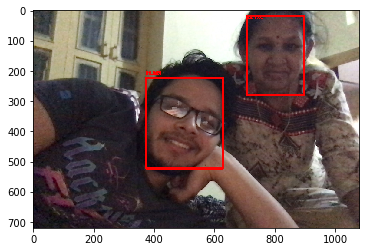

In [62]:
output=image.copy()
for i in range(detections.shape[2]):
    confi=detections[0,0,i,2]
    if confi>confidence:
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype(int)
        text="{:.2f}%".format(confi*100) # text to be printed on image
        print("confidence is: ",confi*100)
        y = startY - 10 if startY - 10 > 10 else startY + 10 # text over box
        cv2.rectangle(output,(startX,startY),(endX,endY),(0,0,255),5)
        cv2.putText(output,text,(startX,y),cv2.FONT_HERSHEY_SIMPLEX,0.45,(0,0,255),2)
showIMG(output)